In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
from scipy.ndimage import median_filter
import sys
import os
import struct
import pywt

sys.path.append(os.path.join(os.getcwd(), 'EC'))
import constants
import Func_read_data
import Func_despike_data
import sensor_info
import Func_DR
import Func_MRFD

importlib.reload(Func_read_data)
importlib.reload(Func_despike_data)
importlib.reload(constants)
importlib.reload(sensor_info)
importlib.reload(Func_DR)
importlib.reload(Func_MRFD)

from Func_read_data import *
from constants import *
from Func_despike_data import *
from sensor_info import *
from Func_MRFD import *
from Func_DR import *

Heights dictionary: {'Ux': [26], 'Uy': [26], 'Uz': [26], 'Ts': [26], 'LI_CO2m': [26], 'LI_H2Om': [26], 'LI_Pres': [26], 'LI_diag': [26], 'diag_csat': [26]}
Plausibility limits applied
Processing large dataset (%)
Spikes removed from Ux,Uy,Uz,Ts:35 Spikes removed from LI_H2Om:35


/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_despike_data.py:185: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'/home/engbers/Documents/PhD/Data/EC_despiked/Figures/EC_despiked_{sensor}.png', bbox_inches='tight')


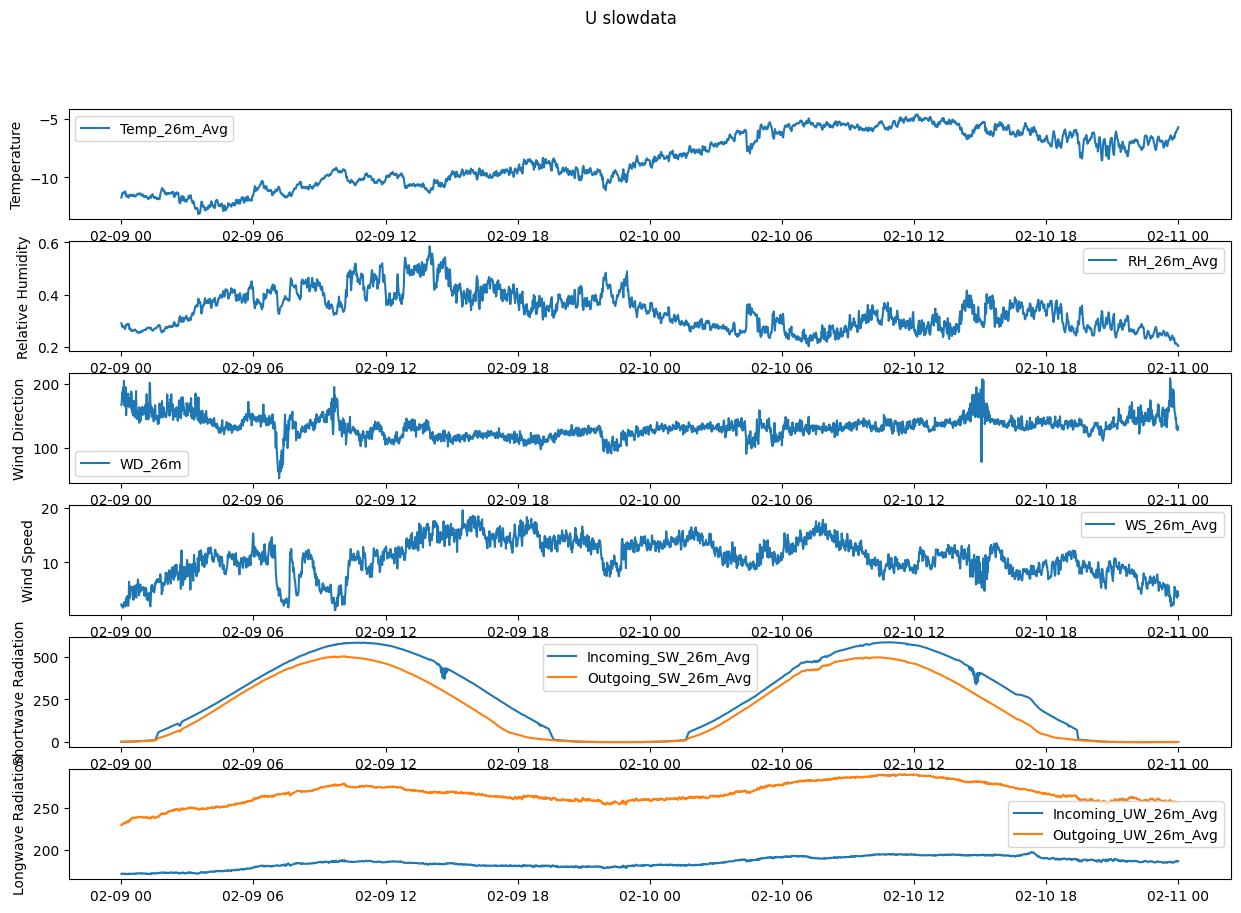

/home/engbers/miniconda3/envs/myenv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


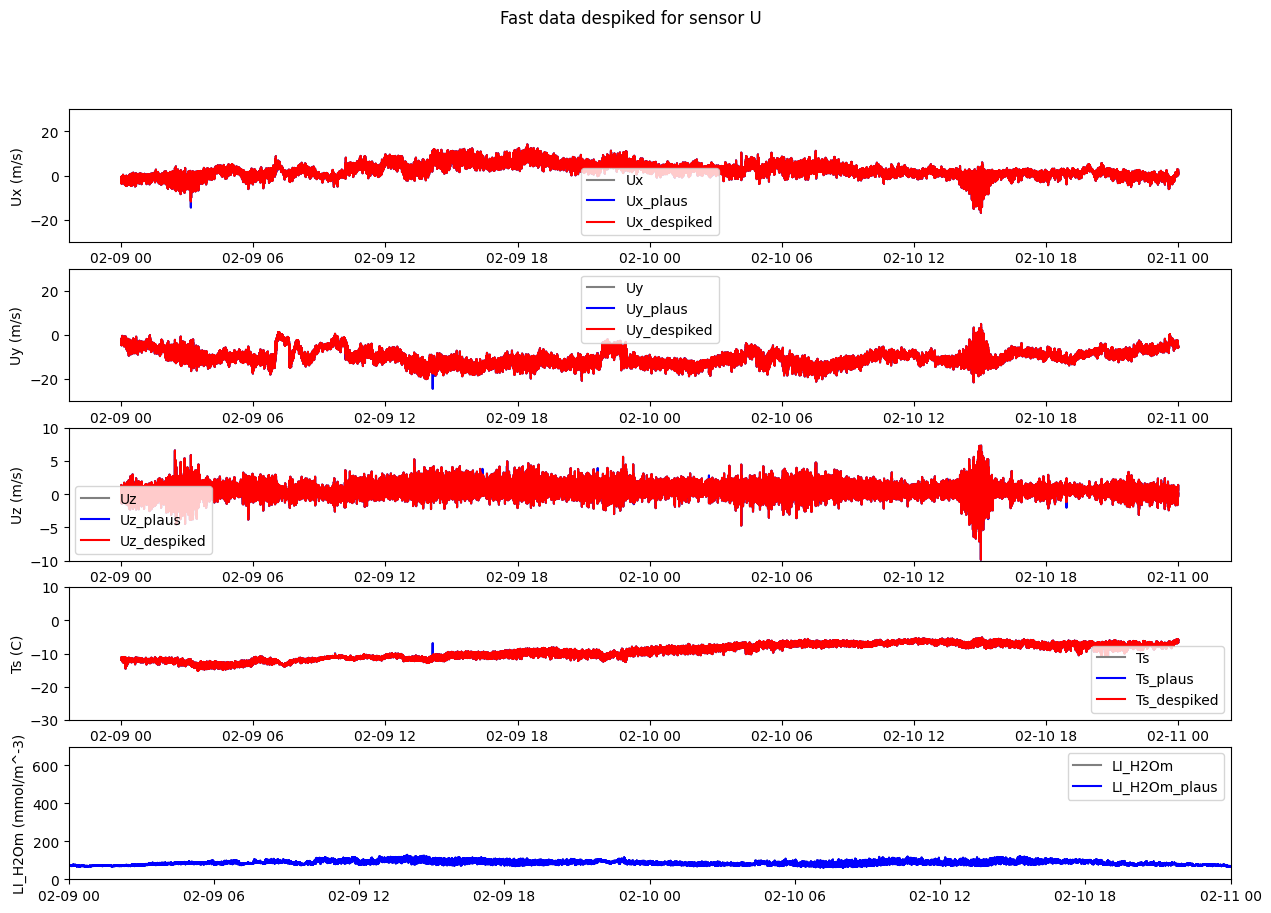

In [ ]:
sensor='U'
start='2025-02-09 00:00'
end='2025-02-11 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights, folder_name = get_sensor_info(sensor)
"""READ FAST AND SLOW DATA from folder"""
folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
fastdata=read_data(folder, 'fast', sensor, start, end)

folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
slowdata=read_data(folder, 'slow', sensor, start, end, plot_data=True)

"""DESPIKE, PLOT, AND SAVE"""
despiked_fastdata=despike_fast_MAD(fastdata, slowdata, plim, sensor, calibration_coefficients=calibration_coefficients, plot_despike=True)
despike_fast_MAD()
"""DOUBLE ROTATE THE DATA TO ALIGN WIND VECTOR WITH X-AXIS"""
fastdata_rot, angles=double_rotation(despiked_fastdata)


""" APPLY MRD TO FIND AVERAGING  TIMESCALE"""

M=16
(mrd_x, mrd_data, time_middle)=completemrd(fastdata_rot, 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)


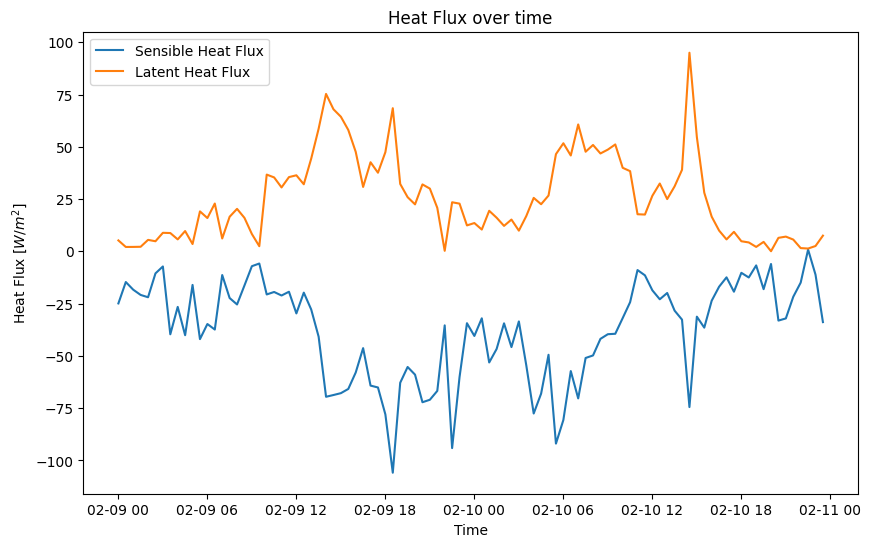

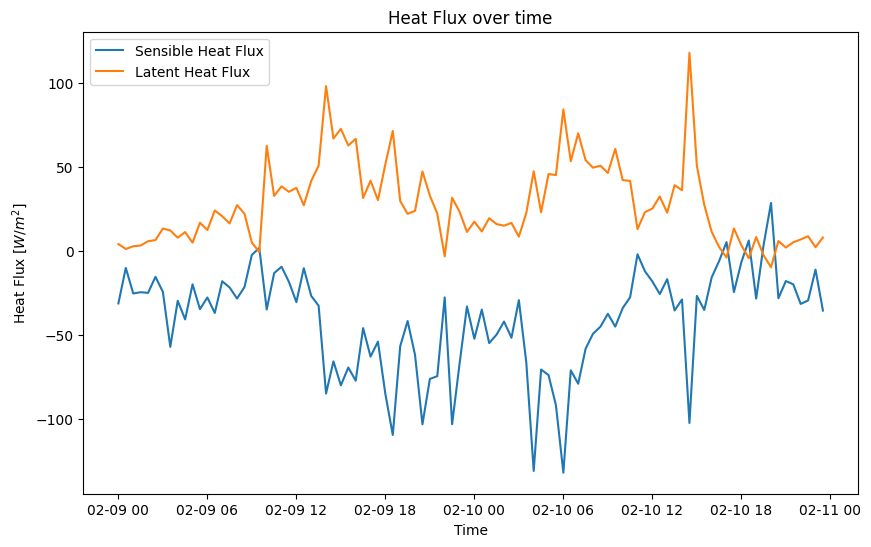

In [304]:
""" CHECK HEATFLUX QUICKLY WITH AVERAGING INTERVAL FOM MRD"""
df_heatflux=check_heat_flux(fastdata_rot, '3min', plot=True)
df_heatflux=check_heat_flux(fastdata_rot, '15min', plot=True)

In [288]:
fastdata.attrs['units']

{'TIMESTAMP': 'TS',
 'RECORD': 'RN',
 'Ux_26m': 'm/s',
 'Uy_26m': 'm/s',
 'Uz_26m': 'm/s',
 'Ts_26m': 'degC',
 'LI_CO2m_26m': 'mmol/m3',
 'LI_H2Om_26m': 'mmol/m3',
 'LI_Pres_26m': 'kPa',
 'LI_diag_26m': 'unitless',
 'diag_csat_26m': 'none'}

In [281]:
fastdata_rot

,RECORD,Ux,Uy,Uz,Ts,LI_CO2m,LI_H2Om,LI_Pres,LI_diag,diag_csat
TIMESTAMP,,,,,,,,,,
2025-02-09 00:00:00.000,2294617,4.765987,0.228978,1.080463,-11.409060,16.16549,72.65046,82.29378,248.0,0
2025-02-09 00:00:00.100,2294618,4.473337,0.342521,1.040724,-11.452670,16.16411,72.47697,82.29378,248.0,0
2025-02-09 00:00:00.200,2294619,4.570207,0.228653,0.935886,-11.380000,16.16500,72.57101,82.32256,248.0,0
2025-02-09 00:00:00.300,2294620,4.508776,0.282818,0.934783,-11.402620,16.16287,72.69469,82.32528,248.0,0
2025-02-09 00:00:00.400,2294621,4.611115,0.470315,0.961204,-11.388090,16.16385,72.60616,82.29378,248.0,0
...,...,...,...,...,...,...,...,...,...,...
2025-02-11 00:00:59.500,4023216,4.896393,2.717614,0.491949,-5.783051,16.02427,65.90383,82.81492,248.0,0
2025-02-11 00:00:59.600,4023217,4.746661,2.592127,0.469766,-5.817291,16.02364,65.98152,82.81784,248.0,0
2025-02-11 00:00:59.700,4023218,4.933404,2.806572,0.554809,-5.814056,16.02207,66.01935,82.81784,248.0,0


In [270]:
fastdata_rot.Uz.isna().sum()   
blockdur='30min'
blockdur = pd.Timedelta(blockdur)
freq = (fastdata.index[1] - fastdata.index[0]).total_seconds()
blockduridx = int(blockdur / pd.Timedelta(f'{freq}s'))
blockduridx*0.01

180.0

In [26]:
fastdata_rot.to_csv(f'/home/engbers/Documents/PhD/Data/EC_despiked/{folder_name}/fast_{sensor}_{pd.Timestamp(start).strftime('%Y-%m-%d')}_{pd.Timestamp(end).strftime('%Y-%m-%d')}.csv')

/home/engbers/Documents/Github/DataProcessingScripts/EC/Func_MRFD.py:65: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gaps = pd.concat([gaps, pd.DataFrame({'idx_before_gap': [len(data)],


MRD for DataFrame
Number of gaps: 1


 98%|█████████▊| 1696968/1728600 [05:28<00:06, 5162.90it/s]


NameError: name 'fastdata_rot' is not defined

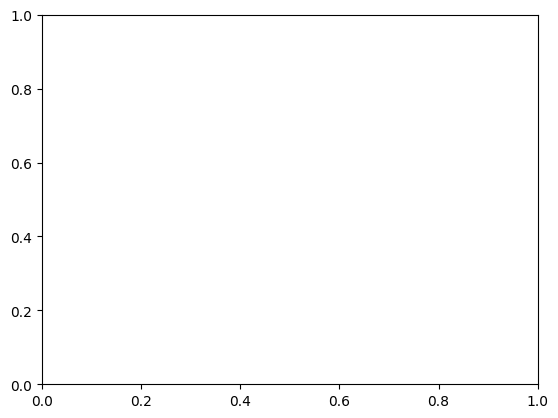

In [258]:
M=15
(mrd_x_1, mrd_data_1, time_middle_1)=completemrd(fastdata_rot, 'Uz', 'Ts', M, shift=round(int(0.1 * 2**M)), plot=True)


/tmp/ipykernel_1793656/983133572.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


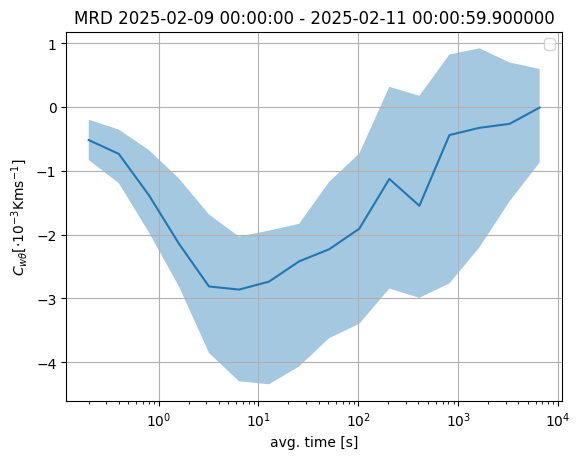

In [ ]:
fig, ax = plt.subplots()

# Set title dynamically using first and last time values from evaldf1
ax.set_title(f"MRD {fastdata_rot.index[0]} - {fastdata_rot.index[-1]}")
ax.set_xlabel("avg. time [s]")
ax.set_ylabel(r"$C_{w\theta} [\cdot 10^{-3} \mathrm{Kms^{-1}}]$")
ax.grid(True)

ax.set_xscale("log")

# Plot the median MRD values
ax.plot(np.array(seconds_array) ,(np.nanmedian(mrd_data_1, axis=1))*1000)

# Fill between the quantiles
ax.fill_between(np.array(seconds_array), 
                np.nanquantile(mrd_data_1, 0.25, axis=1) * 1000, 
                np.nanquantile(mrd_data_1, 0.75, axis=1) * 1000, 
                alpha=0.4)

ax.legend()
plt.show()


In [30]:
sensor='SFC'
start='2025-02-01 00:00'
end='2025-02-12 00:00'

"""GET SENSOR INFO"""
plim, calibration_coefficients, heights, folder_name = get_sensor_info(sensor)
"""READ FAST AND SLOW DATA from folder"""
folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
fastdata=read_data(folder, 'fast', sensor, start, end)

folder=f'/home/engbers/Documents/PhD/Data/EC/{folder_name}/'
slowdata=read_data(folder, 'slow', sensor, start, end)

Heights dictionary: {}
